<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>LGBMRegressor</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>XGBoost</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>LGBMRegressor</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>XGBoost</a></span></li><li><span><a href="#Выбор-Модели" data-toc-modified-id="Выбор-Модели-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Выбор Модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, fbeta_score, make_scorer
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
%matplotlib inline
import xgboost as xgb
from xgboost import XGBRegressor
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 16, 6
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import pathlib
from pathlib import Path
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.metrics import mean_squared_error
from catboost import Pool, CatBoostRegressor, cv
from lightgbm import LGBMRegressor
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("/datasets/taxi.csv", index_col=[0], parse_dates=[0])
data.sort_index(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [3]:
data.describe()

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


In [4]:
data.isna().mean()

num_orders    0.0
dtype: float64

### Вывод

1. Представлены заказы такси с интервалом 10 минут с 2018-03-01 00:00:00 по 2018-08-31 23:50:00
2. Пропусков нет
3. Стандартное отклонение 45.
4. Всего один признак: колличество заказов.
5. Необходимо создать признаки календарные, скользящие и отстающие значения.

## Анализ

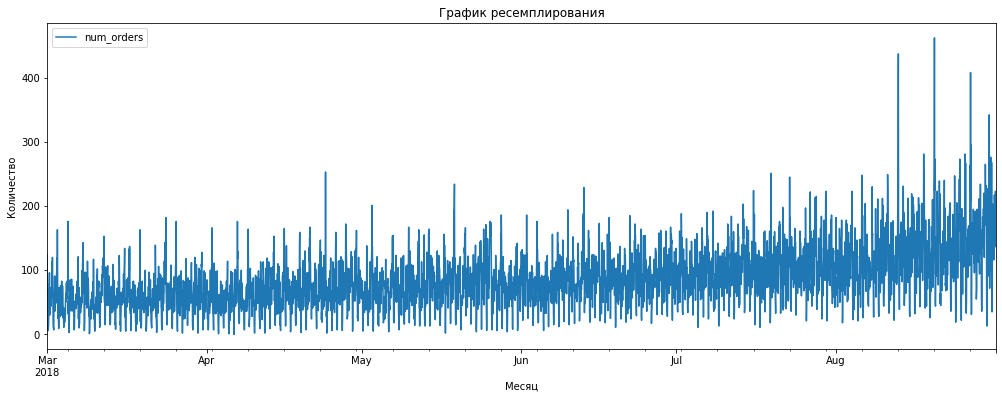

In [5]:
# Проведем ресемплирование и отобразим граффик
data = data.resample('1H').sum()
figsize = (17, 6)
data.plot(figsize=figsize)
plt.title('График ресемплирования')
plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.show()

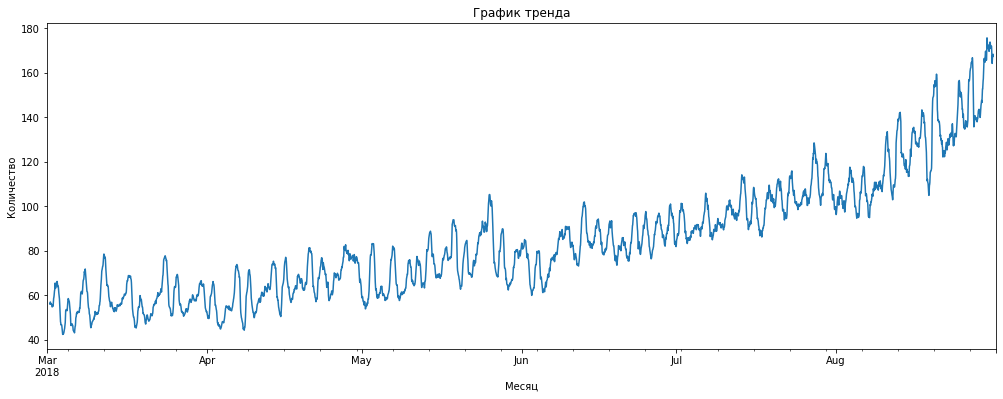

In [6]:
# Разложим временной ряд на три составляющие: тренд, сезонность и остаток
decomposed_data = seasonal_decompose(data)
decomposed_data.trend.plot(figsize=figsize)
plt.title('График тренда')
plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.show()

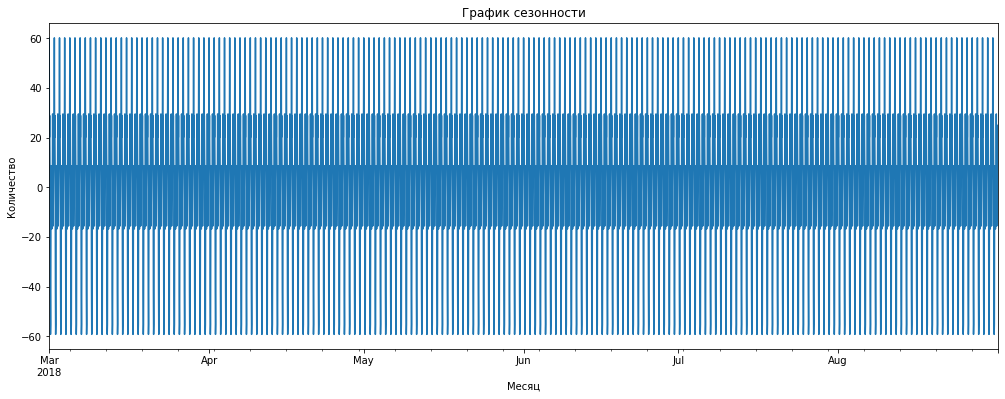

In [7]:
decomposed_data.seasonal.plot(figsize=figsize)
plt.title('График сезонности')
plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.show()

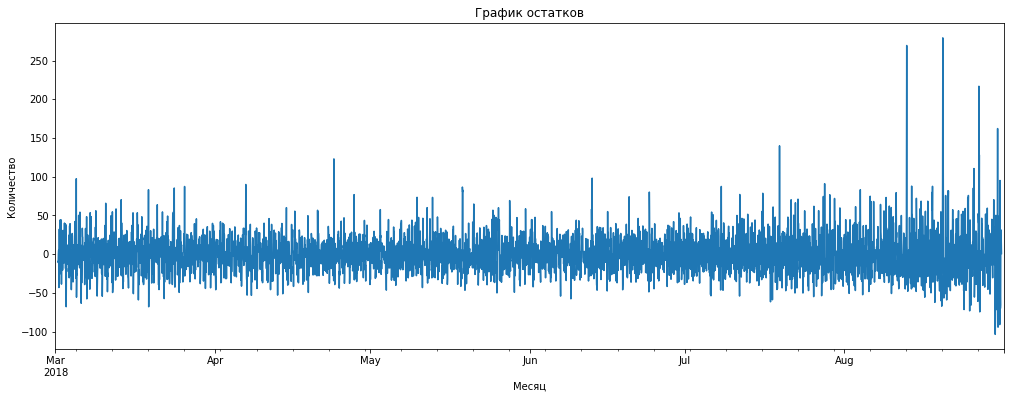

In [8]:
decomposed_data.resid.plot(figsize=figsize)
plt.title('График остатков')
plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.show()

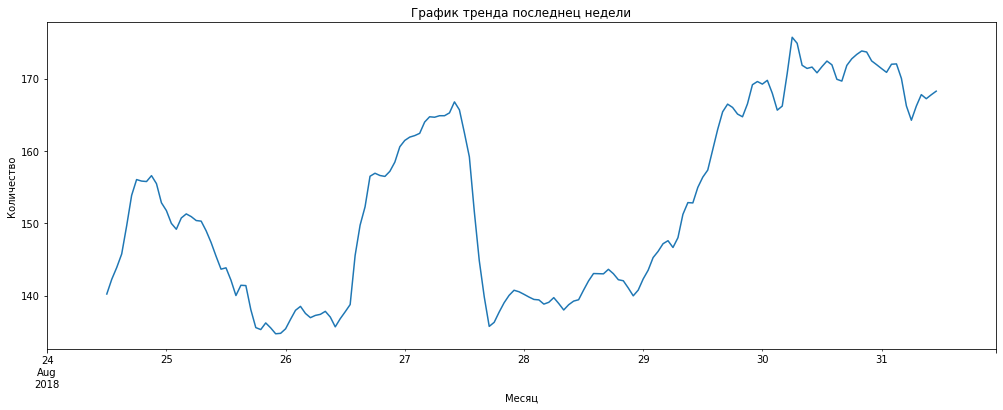

In [9]:
# Разложим последнюю неделю на три составляющие: тренд, сезонность и остаток
decomposed_data = seasonal_decompose(data['2018-08-24':'2018-08-31'])
decomposed_data.trend.plot(figsize=figsize)
plt.title('График тренда последнец недели')
plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.show()

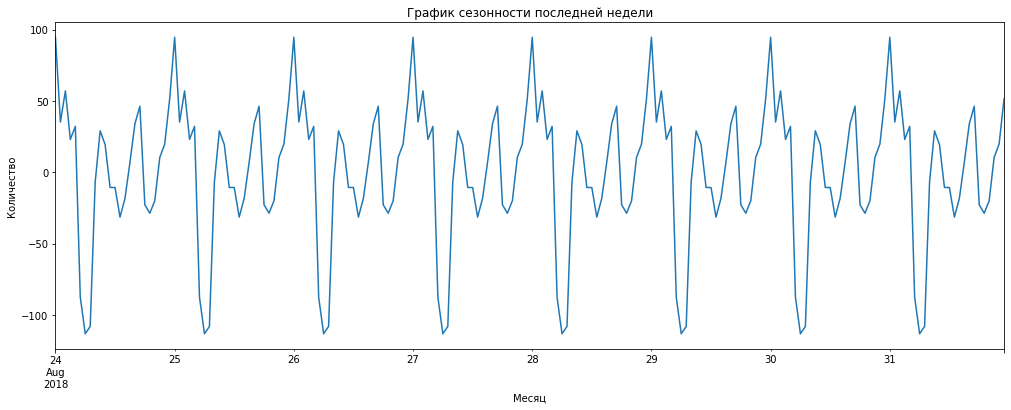

In [10]:
decomposed_data.seasonal.plot(figsize=figsize)
plt.title('График сезонности последней недели')
plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.show()

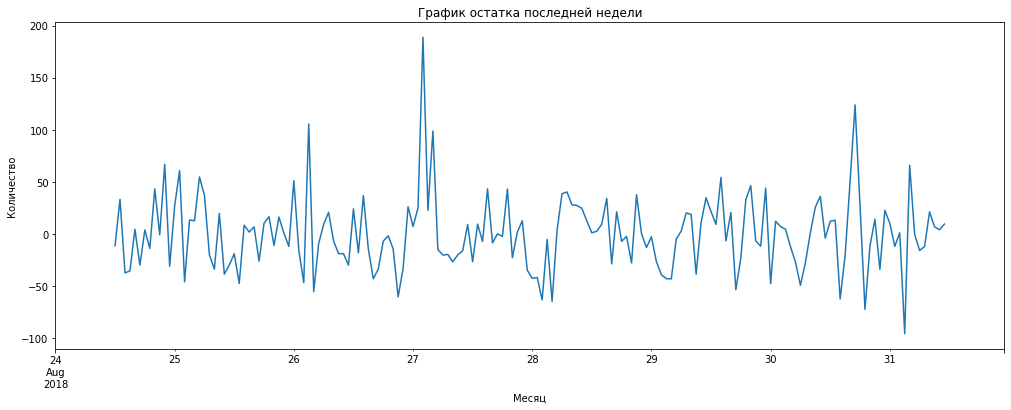

In [11]:
decomposed_data.resid.plot(figsize=figsize)
plt.title('График остатка последней недели')
plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.show()

Создам функцию make_features, которая добавляет фактор месяца и фактор дня исходя из общего тренда, и обавляет фактор дня недели (на графике недели видим большую вариацию добавляет фактор часа, прослеживаем пики активности в течении суток). Добавляет lag

Дисперсия увеличичвается. Тренд растет, т.е. количествово заказов и пользователей увеличивается. Наблюдается, что в ранним утром количество заказов резко падает.

Временной ряд в не является стационарным, так как подвержен тренду, который меняется во времени.

In [12]:
# код ревьювера
from statsmodels.tsa.stattools import adfuller

ts = data['num_orders']
st_test = adfuller(ts, regression='ctt')

print('Если значение с индексом 1 меньше P-Value, заданное нами (обычно берут 0.05), то ряд стационарный')
if st_test[1] < 0.05:
    print('Наш ряд стационарный')
else:
    print('Ряд нестационарный')



Если значение с индексом 1 меньше P-Value, заданное нами (обычно берут 0.05), то ряд стационарный
Наш ряд стационарный


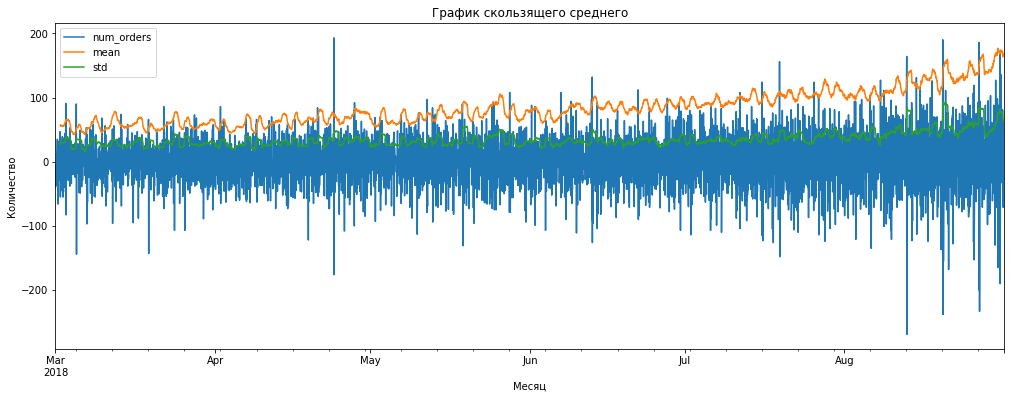

In [12]:
taxi_shift = data - data.shift()
taxi_shift['mean'] = data['num_orders'].rolling(24).mean()
taxi_shift['std'] = data['num_orders'].rolling(24).std()
taxi_shift.plot(figsize=figsize)
plt.title('График скользящего среднего')
plt.xlabel('Месяц')
plt.ylabel('Количество');

Необходимые признаки: 

'day' - видна ежедневная сезонность,
'month' - графику сезонности,
'dayofweak' - по графику остатков.

lag примем как 24 часа

rolling_mean примем как сутки, т.е. 48 часов

In [13]:
# Создадим признаки для обучения модели
max_lag = 24
rolling_mean_size = 48
def make_features(data, column, max_lag, rolling_mean_size):
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data[column].shift(lag)

    data['rolling_mean'] = data[column].shift().rolling(rolling_mean_size).mean()

In [14]:
df = data.copy()

make_features(data,'num_orders', max_lag, rolling_mean_size)

train, test = train_test_split(data, shuffle=False, test_size=0.1, random_state=1515)
train = train.dropna()

features_train = train.drop('num_orders', axis=1)
target_train = train['num_orders']
features_test = test.drop('num_orders', axis=1)
target_test = test['num_orders']

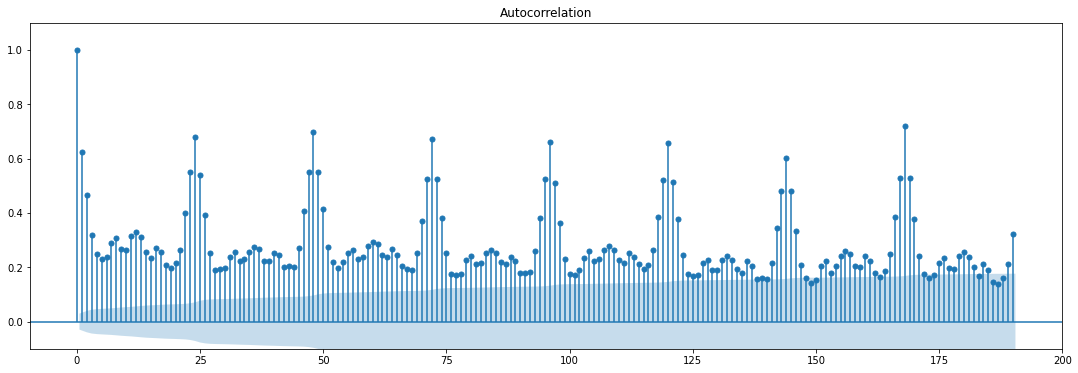

In [17]:
from statsmodels.graphics import tsaplots

taxi = pd.read_csv("/datasets/taxi.csv", index_col=[0], parse_dates=[0]).resample('1H').sum()
ts = taxi['num_orders']

fig = tsaplots.plot_acf(ts,lags= 190)
fig.set_size_inches(18.5, 6)
plt.ylim(-.1, 1.1)
plt.show() 


In [18]:
df.head(3)

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71


In [19]:
df = df.dropna()

In [20]:
df.shape

(4416, 1)

In [21]:
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


1. Фактор месяца, исходя из общего тренда, играет роль
2. Фактор дня играет также роль (имеет тенденцию также относительно месяца расти с течением времени)
3. Фактор дня недели играет одну из самых важных ролей (данные исходя из него сильно варьируются)
4. Фактор часа играет самую важную роль (прогнозирование на час вперед также на его фоне выделили сезонность ,где есть очень важные часы пиков и минимумов)
5. Фактор lag нужен для определения интервала на котором обучается модель из целевого признака исходя из желаемого горизонта (если ресампл на день , а прогноз строим на неделю вперед ,то lag(7)) в нашем случае прогноз на час вперед ,то берем и lag(1)

In [22]:
# Функция для вычесления rmse
def rmse(first_list, second_list):
    return np.sqrt(mean_squared_error(first_list, second_list))

### Вывод 

1. Из декомпозиции можно отметить, что тренд указывает на увеличение заказов
2. Сезоность указывает на высокий спрос на такси в ночное время, потому что в это время не работает общественный транспорт.
3. Можно сказать, что стохастический процесс нестационарный
4. По тренду видно, что со временем все больше и больше людей пользуется услугой заказа такси.
5. Спрос высокий в понедельник и увеличивается со среды по пятницу, выходные дни менее активны.
6. При разложении по последней неделе видно, что имеются пиковые часы и больше всего такси используется в ночное время и дальше спрос максимально спадает под утро.

## Обучение

### Linear Regression

In [25]:
%%time

# С масштабированием
regressor = LinearRegression()
scaller = StandardScaler()
pipeline = Pipeline([("standard_scaller", scaller),("linear_regression", regressor)])
print('# Train for root_mean_squared_error')
print()
cv_RMSE_LR_S = (cross_val_score(pipeline,
                                features_train, 
                                target_train, 
                                cv=5, 
                                scoring='neg_mean_squared_error').mean() * -1) ** 0.5
print('Mean RMSE from CV of LinearRegression =', cv_RMSE_LR_S)

# Train for root_mean_squared_error

Mean RMSE from CV of LinearRegression = 26.280803897631063
CPU times: user 368 ms, sys: 770 ms, total: 1.14 s
Wall time: 1.05 s


### CatBoost

In [29]:
model_Cat = CatBoostRegressor( random_state = 42)
hyperparams = [{'depth' : [3],
                'learning_rate' : [0.1],
                'iterations' : [300],
                'verbose' : [False]
               }]
my_cv=TimeSeriesSplit(n_splits=3).split(features_train)
clf = GridSearchCV(model_Cat, hyperparams, cv=my_cv, scoring='neg_mean_squared_error')
clf.fit(features_train, target_train)

print((clf.best_score_*-1)**0.5)

27.15173970108521


In [30]:
best_params_CBR = clf.best_params_
print(best_params_CBR)

{'depth': 3, 'iterations': 300, 'learning_rate': 0.1, 'verbose': False}


### LGBMRegressor

In [33]:
LGBMR = LGBMRegressor() 
hyperparams = [{'depth' : [3],
                'learning_rate':[0.03],
                'verbose' : [10],
                'random_state':[42]}]

my_cv=TimeSeriesSplit(n_splits=3).split(features_train)
clf = GridSearchCV(model_Cat, hyperparams, cv=my_cv, scoring='neg_mean_squared_error')
clf.fit(features_train, target_train)

0:	learn: 28.8912504	total: 1.24ms	remaining: 1.24s
10:	learn: 26.1088115	total: 12.4ms	remaining: 1.11s
20:	learn: 24.0514300	total: 22.6ms	remaining: 1.05s
30:	learn: 22.5951455	total: 32.9ms	remaining: 1.03s
40:	learn: 21.6676287	total: 42.7ms	remaining: 999ms
50:	learn: 20.9124481	total: 53.1ms	remaining: 989ms
60:	learn: 20.3443931	total: 63.5ms	remaining: 978ms
70:	learn: 19.9258303	total: 73.6ms	remaining: 963ms
80:	learn: 19.5438365	total: 84.1ms	remaining: 954ms
90:	learn: 19.2522034	total: 94.8ms	remaining: 947ms
100:	learn: 18.9875588	total: 107ms	remaining: 950ms
110:	learn: 18.7454416	total: 119ms	remaining: 954ms
120:	learn: 18.5501958	total: 133ms	remaining: 966ms
130:	learn: 18.3468420	total: 145ms	remaining: 964ms
140:	learn: 18.1552921	total: 156ms	remaining: 950ms
150:	learn: 18.0100994	total: 166ms	remaining: 935ms
160:	learn: 17.8830780	total: 176ms	remaining: 919ms
170:	learn: 17.7636577	total: 186ms	remaining: 904ms
180:	learn: 17.6238484	total: 196ms	remaining: 

GridSearchCV(cv=<generator object TimeSeriesSplit.split at 0x7f5fa7297430>,
             estimator=<catboost.core.CatBoostRegressor object at 0x7f60585e7b50>,
             param_grid=[{'depth': [3], 'learning_rate': [0.03],
                          'random_state': [42], 'verbose': [10]}],
             scoring='neg_mean_squared_error')

In [34]:
print(clf.best_params_)
print((clf.best_score_*-1)**0.5)

{'depth': 3, 'learning_rate': 0.03, 'random_state': 42, 'verbose': 10}
27.08453573185843


### XGBoost

In [35]:
modelXGB = XGBRegressor(random_state = 42)
param_search = {'max_depth' : [3],
                'learning_rate' : [0.1],
                'n_estimators' : [500]
               }
tscv = TimeSeriesSplit(n_splits=5)
gsearchXGB = GridSearchCV(estimator=modelXGB, cv=tscv,
                        param_grid=param_search,scoring = 'neg_root_mean_squared_error')
gsearchXGB.fit(features_train, target_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth...
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=42, reg_alpha=None,
                                    reg_l

In [36]:
gsearchXGB.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}

In [37]:
np.abs(gsearchXGB.best_score_)

25.831840049214208

## Тестирование

### Linear Regression

44.8933272290983


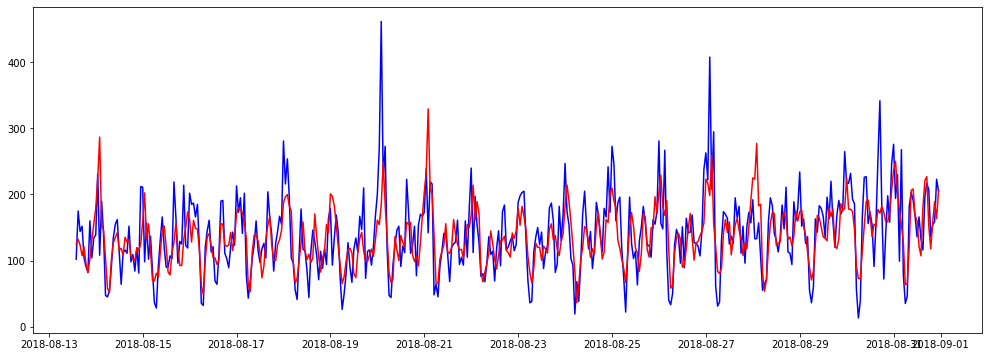

In [38]:
model = LinearRegression()
model.fit(features_train, target_train)
target_predict = model.predict(features_test)
rmse_lr = mean_squared_error(target_test, target_predict) ** 0.5
print(rmse_lr)
plt.figure(figsize=figsize)
plt.plot(target_test.index, target_test, 'b-', target_test.index, target_predict,'r-')
plt.show()

### CatBoost

43.777591279775415


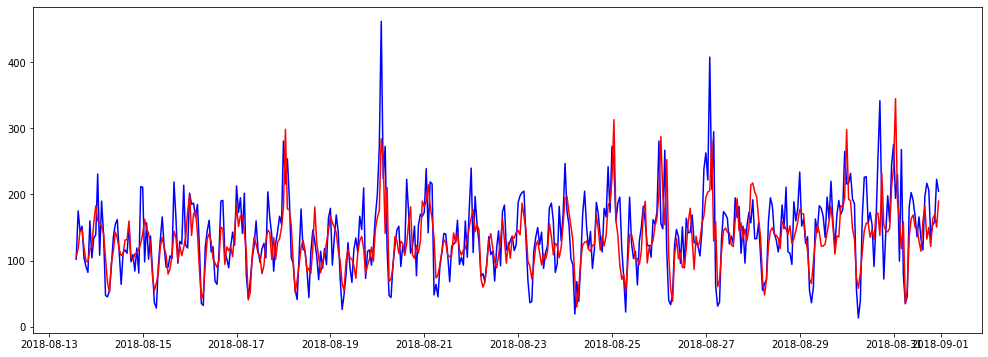

In [39]:
modelCat = CatBoostRegressor(depth = 3, iterations = 300, learning_rate = 0.1, verbose= False)
modelCat.fit(features_train, target_train)
modelCat_predict = modelCat.predict(features_test)
rmse_cbr = mean_squared_error(target_test, modelCat_predict) ** 0.5
print(rmse_cbr)
plt.figure(figsize=figsize)
plt.plot(target_test.index, target_test, 'b-', target_test.index, modelCat_predict,'r-')
plt.show()

### LGBMRegressor

In [40]:
model_XGB = XGBRegressor(depth = 3, learning_rate = 0.03, random_state = 42)
LGBMR.fit(features_train, target_train)
target_predict = LGBMR.predict(features_test)
rmse_LGBMR = mean_squared_error(target_test, target_predict) ** 0.5

In [41]:
print(rmse_LGBMR)

42.76593826727119


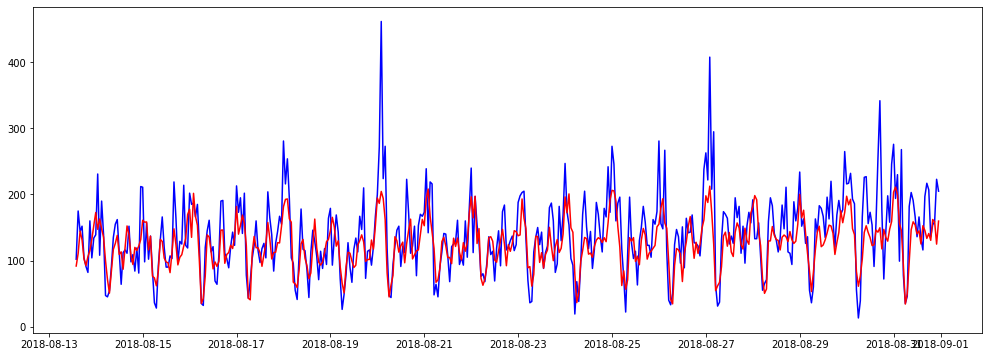

In [42]:
plt.figure(figsize=figsize)
plt.plot(target_test.index, target_test, 'b-', target_test.index, target_predict,'r-')
plt.show()

### XGBoost

In [43]:
modelXGB = XGBRegressor(max_depth = 3, n_estimators = 500, learning_rate = 0.03,random_state = 42)
modelXGB.fit(features_train, target_train, eval_set = [(features_train, target_train),(features_test, target_test)], eval_metric = 'rmse', verbose = 10);
rmse_XGB = mean_squared_error(target_test, modelXGB.predict(features_test))**0.5

[0]	validation_0-rmse:84.75133	validation_1-rmse:147.66176
[10]	validation_0-rmse:65.24554	validation_1-rmse:120.36414
[20]	validation_0-rmse:51.44598	validation_1-rmse:101.19049
[30]	validation_0-rmse:41.87197	validation_1-rmse:87.08401
[40]	validation_0-rmse:35.43067	validation_1-rmse:76.30447
[50]	validation_0-rmse:31.16610	validation_1-rmse:68.57097
[60]	validation_0-rmse:28.39693	validation_1-rmse:62.78225
[70]	validation_0-rmse:26.62993	validation_1-rmse:58.71807
[80]	validation_0-rmse:25.46465	validation_1-rmse:55.66510
[90]	validation_0-rmse:24.67821	validation_1-rmse:52.83744
[100]	validation_0-rmse:24.11870	validation_1-rmse:50.91823
[110]	validation_0-rmse:23.73100	validation_1-rmse:49.70696
[120]	validation_0-rmse:23.41411	validation_1-rmse:48.83980
[130]	validation_0-rmse:23.13995	validation_1-rmse:48.11592
[140]	validation_0-rmse:22.92926	validation_1-rmse:47.59562
[150]	validation_0-rmse:22.74248	validation_1-rmse:47.40907
[160]	validation_0-rmse:22.57251	validation_1-rm

In [44]:
print(rmse_XGB)

45.161389353830856


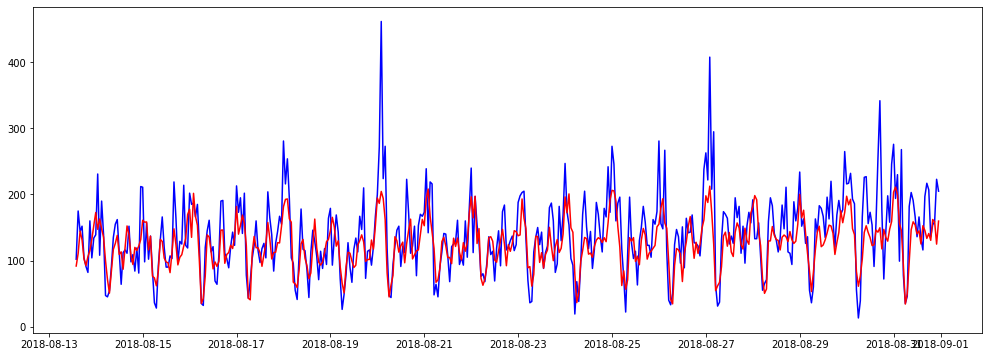

In [45]:
plt.figure(figsize=figsize)
plt.plot(target_test.index, target_test, 'b-', target_test.index, target_predict,'r-')
plt.show()

### Выбор Модели

In [46]:
predictive_model_scores = pd.DataFrame(data=[('Linear Regression',rmse_lr), 
                                             ('LGBMRegressor', rmse_LGBMR),
                                            ('CatBoost',rmse_cbr),
                                             ('XGBoost',rmse_XGB)],
                                       columns=['model', 'testing_rmse'])
predictive_model_scores

,model,testing_rmse
0,Linear Regression,44.893327
1,LGBMRegressor,42.765938
2,CatBoost,43.777591
3,XGBoost,45.161389


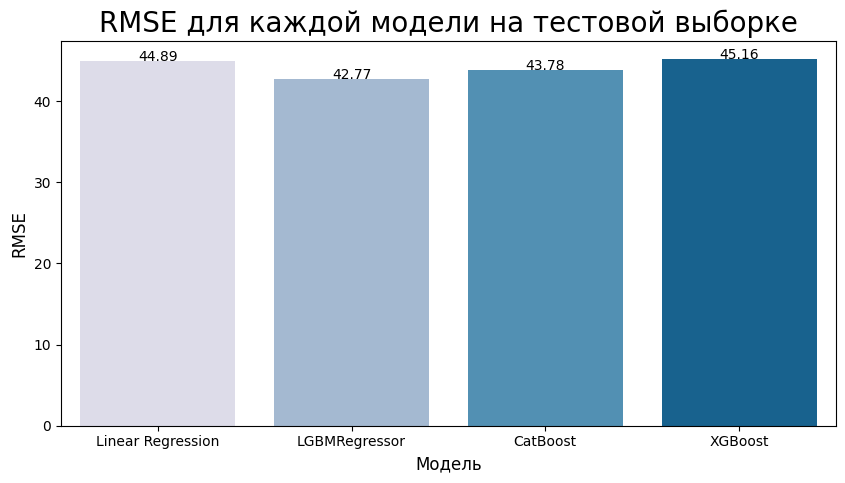

In [47]:
plt.style.use('default')
plt.figure(figsize=(10,5))
p=sns.barplot(x='model', y='testing_rmse', data=predictive_model_scores, palette='PuBu')
plt.title('RMSE для каждой модели на тестовой выборке', fontsize = 20)
plt.xlabel('Модель', fontsize = 12)
plt.ylabel('RMSE', fontsize = 12)
for index, row in predictive_model_scores.iterrows():
    p.text(x=row.name, y=row.testing_rmse, s=round(row.testing_rmse,2), color='black', horizontalalignment='center');

#### Вывод

Значение метрики RMSE на лучшей модели на тестовой выборке не превышает указанного в задании 48 у всех моделей. Однако, лучшая модель - это LGBMRegressor (rmse_test - 40.6100).